In [34]:
import numpy as np
import pandas as pd 
import nltk 
import spacy 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from tqdm import tqdm




In [3]:

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
data = pd.read_csv('bbc-text.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
print(data.shape)

(2225, 2)


In [6]:
print(data.category.unique())

['tech' 'business' 'sport' 'entertainment' 'politics']


In [7]:
text = data['text']

print(text)

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object


In [8]:
def preprocess(text):
    text = text.lower()
    stop_w = set(stopwords.words('english'))
    words = word_tokenize(text)
    filter_w = [word for word in words if word not in stop_w]
    lemma = WordNetLemmatizer()
    lemma_words = [lemma.lemmatize(word) for word in filter_w]
    return ' '.join(lemma_words)
    

In [9]:
data['cleaned_text'] = data['text'].apply(preprocess)

In [10]:
data.head()

,category,text,cleaned_text
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [11]:
vect = TfidfVectorizer()
X= vect.fit_transform(data['cleaned_text'])

print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 342017 stored elements and shape (2225, 26465)>
  Coords	Values
  (0, 24523)	0.3824632947702855
  (0, 10382)	0.04641870328441057
  (0, 11326)	0.053369670430658
  (0, 25367)	0.13871186528358642
  (0, 11903)	0.04014012115487047
  (0, 23802)	0.03648592991315895
  (0, 23401)	0.04765787866572182
  (0, 18227)	0.05000200335376754
  (0, 11749)	0.08440125295437492
  (0, 7141)	0.14926287091994314
  (0, 7558)	0.05452734769261196
  (0, 25352)	0.05443507261332053
  (0, 19573)	0.12333258469597039
  (0, 16142)	0.033019464230190435
  (0, 14540)	0.03385849082859642
  (0, 20548)	0.06749673061511963
  (0, 25693)	0.03501800122645841
  (0, 17872)	0.10690751451532818
  (0, 25666)	0.13207785692076174
  (0, 19237)	0.047599759028479655
  (0, 7543)	0.02634951493501775
  (0, 9837)	0.02010581165959719
  (0, 26312)	0.021491530255266816
  (0, 23973)	0.027806925298252034
  (0, 1626)	0.02185206207636081
  :	:
  (2224, 10524)	0.07141108861766321
  (2224, 22

In [12]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X)
print(cosine_sim)



[[1.         0.01905187 0.02287038 ... 0.02569294 0.04584098 0.0343528 ]
 [0.01905187 1.         0.02332308 ... 0.00338459 0.02392691 0.01637152]
 [0.02287038 0.02332308 1.         ... 0.00425656 0.0251622  0.0561719 ]
 ...
 [0.02569294 0.00338459 0.00425656 ... 1.         0.00837135 0.0106713 ]
 [0.04584098 0.02392691 0.0251622  ... 0.00837135 1.         0.0224551 ]
 [0.0343528  0.01637152 0.0561719  ... 0.0106713  0.0224551  1.        ]]


100%|██████████| 19/19 [00:49<00:00,  2.58s/it]


Text(0.5, 0, 'Number of clusters')

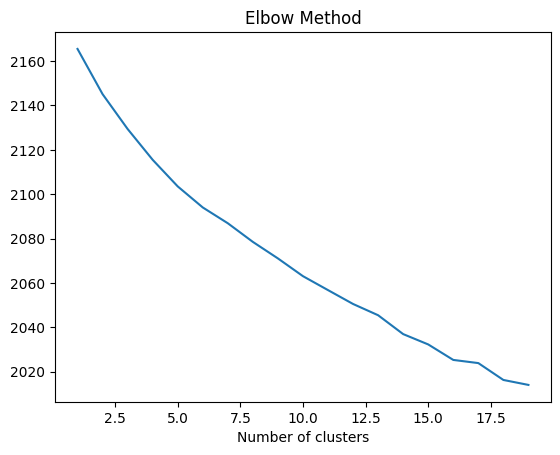

In [62]:
# tqdm is used to display the progress bar
from tqdm import tqdm
# use elbow method to find the optimal number of clusters

wcss = []
for i in tqdm(range(1,20)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')

           
           


In [68]:
from sklearn.manifold import TSNE
def visualize_clusters(X, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X.toarray())

    plt.figure(figsize=(12, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
    plt.colorbar()
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()
    

## KMeans Clustering

Silhouette Score: 0.012690328030762624


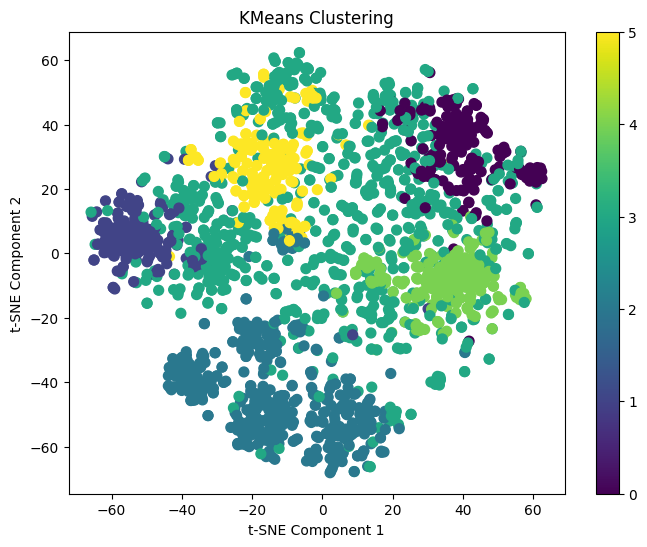

In [67]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)


data['kmeans_cluster'] = y_kmeans

sl_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {sl_score}')


visualize_clusters(X, y_kmeans, 'KMeans Clustering')







## DBSCAN Clustering

Silhouette Score: 0.1432513985324716


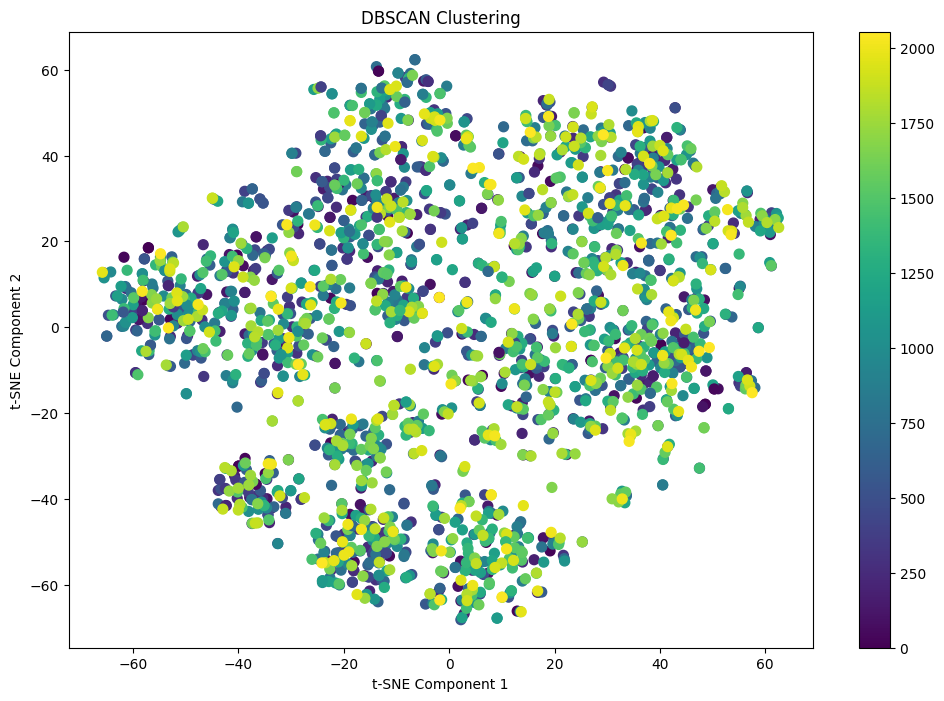

In [69]:
dbscan = DBSCAN(eps=0.5, min_samples=1)
y_dbscan = dbscan.fit_predict(X)

data['dbscan_cluster'] = y_dbscan

# Check the number of unique labels
if len(set(y_dbscan)) > 1:
	sl_score = silhouette_score(X, y_dbscan)
	print(f'Silhouette Score: {sl_score}')
else:
	print("Silhouette Score: Not applicable, only one cluster found.")


visualize_clusters(X, y_dbscan, 'DBSCAN Clustering')


## Agglomerative Clustering

Silhouette Score: 0.00828694811716624


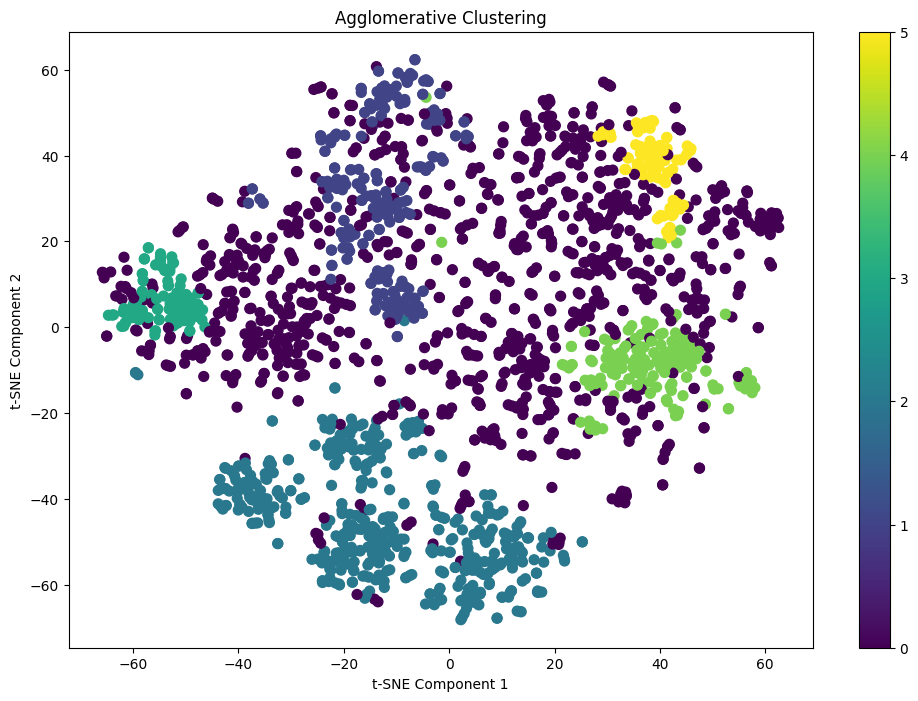

In [71]:
agg_clustering = AgglomerativeClustering(n_clusters=6)
y_agg = agg_clustering.fit_predict(X.toarray())

data['agg_cluster'] = y_agg

sil_score = silhouette_score(X.toarray(), y_agg)
print(f'Silhouette Score: {sil_score}')

visualize_clusters(X, y_agg, 'Agglomerative Clustering')




### Apply Cosine Similarity

In [19]:
cosine_sim = cosine_similarity(X)
# cosine_sim = np.round(cosine_sim, 3)
print(cosine_sim)

X = cosine_sim


[[1.         0.32014664 0.46584322 ... 0.41501356 0.53622878 0.44911159]
 [0.32014664 1.         0.30093516 ... 0.22006191 0.38754047 0.28483429]
 [0.46584322 0.30093516 1.         ... 0.36745105 0.50909318 0.58385303]
 ...
 [0.41501356 0.22006191 0.36745105 ... 1.         0.36377638 0.36830325]
 [0.53622878 0.38754047 0.50909318 ... 0.36377638 1.         0.49660796]
 [0.44911159 0.28483429 0.58385303 ... 0.36830325 0.49660796 1.        ]]


In [29]:
def vis_tsne(X, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    x_tsne = tsne.fit_transform(X)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c = labels, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()
    
    
    

Silhouette Score: 0.21032309192862172


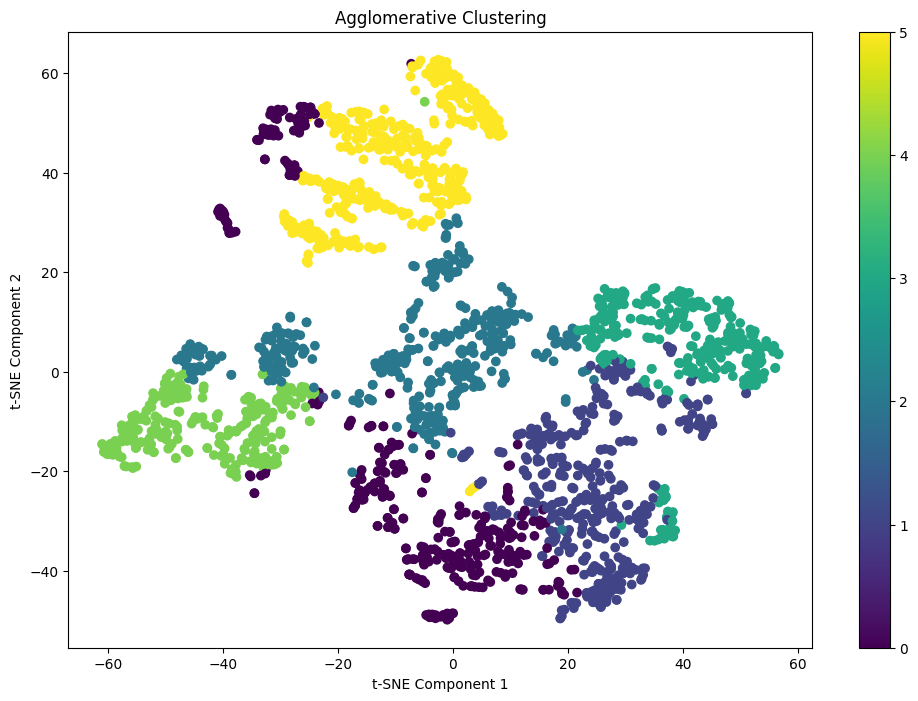

In [ ]:
# Agglomerative Clustering

agg_clustering = AgglomerativeClustering(n_clusters=6)
y_agg = agg_clustering.fit_predict(X)

data['agg_cluster'] = y_agg

sil_score = silhouette_score(X, y_agg)
print(f'Silhouette Score: {sil_score}')

vis_tsne(X, y_agg, 'Agglomerative Clustering')




Silhouette Score: 0.14547011652845176


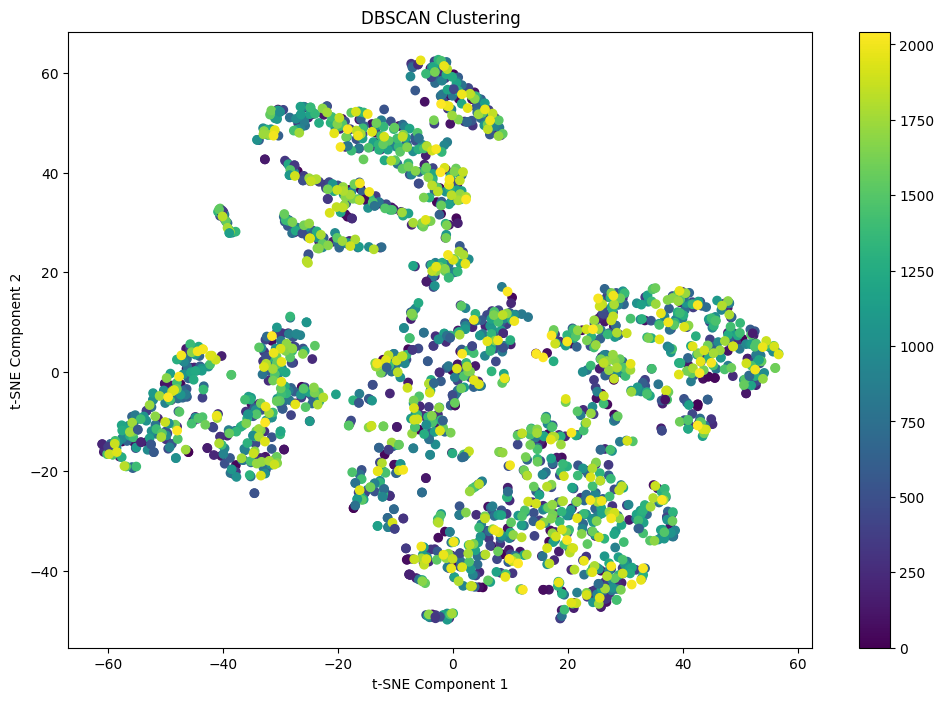

In [31]:
#dbscan 
dbscan = DBSCAN(eps=0.5, min_samples=1)
y_dbscan = dbscan.fit_predict(X)

data['dbscan_cluster'] = y_dbscan

# Check the number of unique labels
if len(set(y_dbscan)) > 1:
    sl_score = silhouette_score(X, y_dbscan)
    print(f'Silhouette Score: {sl_score}')
    
else:
    print("Silhouette Score: Not applicable, only one cluster found.")
    
vis_tsne(X, y_dbscan, 'DBSCAN Clustering')

100%|██████████| 19/19 [00:03<00:00,  4.84it/s]


Text(0.5, 0, 'Number of clusters')

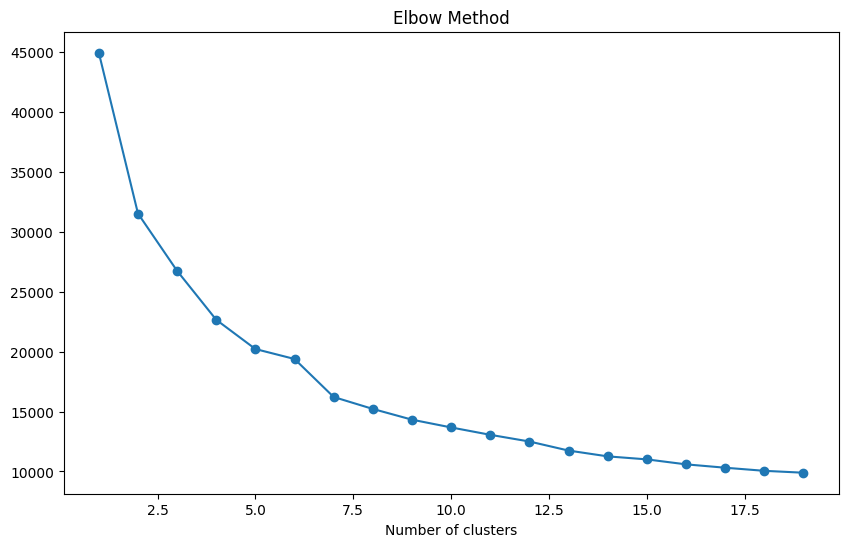

In [42]:
# tqdm is used to display the progress bar
from tqdm import tqdm
# use elbow method to find the optimal number of clusters

wcss = []
for i in tqdm(range(1,20)):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))    
plt.plot(range(1,20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')


           
           


Silhouette Score: 0.21681416740546844


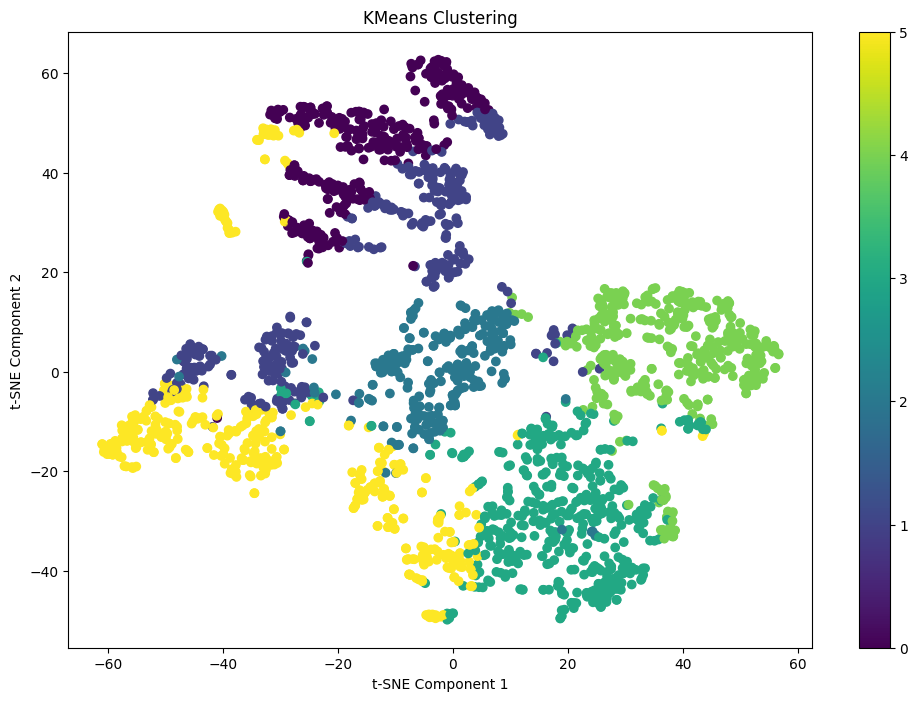

In [32]:
#KMenas
kmeans=  KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X)

data['kmeans_cluster'] = y_kmeans

sl_score = silhouette_score(X, y_kmeans)

print(f'Silhouette Score: {sl_score}')

vis_tsne(X, y_kmeans, 'KMeans Clustering')




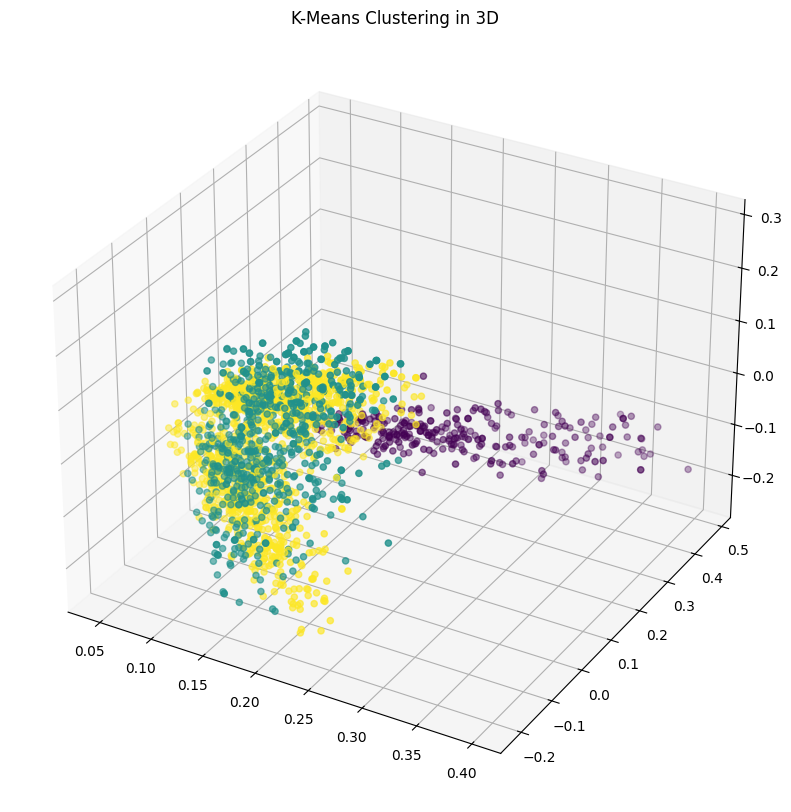

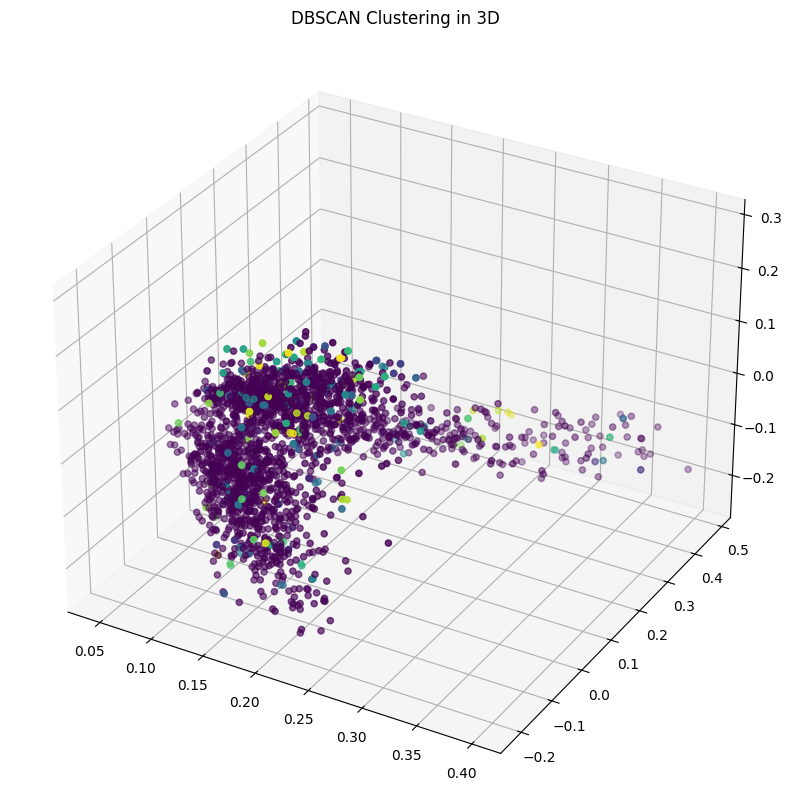

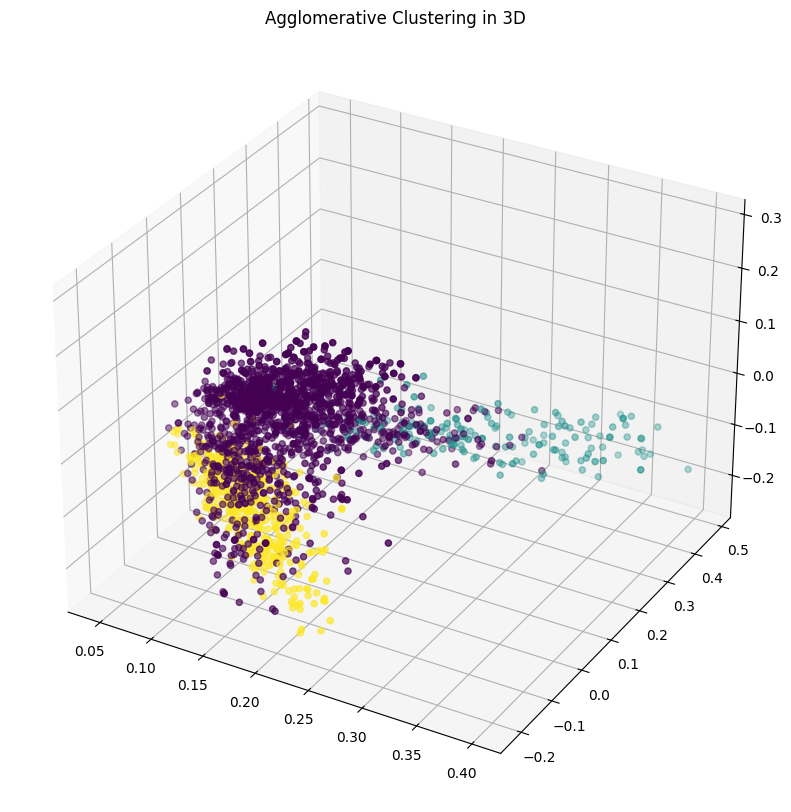

In [ ]:
# # plot cluster in 3d grapgh 
# from sklearn.decomposition import TruncatedSVD
# from mpl_toolkits.mplot3d import Axes3D

# svd = TruncatedSVD(n_components=3)
# X_svd = svd.fit_transform(X)

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=kmeans_labels, cmap='viridis')
# plt.title("K-Means Clustering in 3D")
# plt.show()

# # dbscan 
# # legend also include 
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=dbscan_labels, cmap='viridis')
# plt.title("DBSCAN Clustering in 3D")
# plt.show()



# # Agglomerative Clustering
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=agglo_labels, cmap='viridis')
# plt.title("Agglomerative Clustering in 3D")
# plt.show()




In [28]:
# totoal_cluster of dbscan of kmeans and agglomerative and dbscan 
print(f"Total number of clusters in K-Means: {len(set(kmeans_labels))}")
print(f"Total number of clusters in DBSCAN: {len(set(dbscan_labels))}")
print(f"Total number of clusters in Agglomerative Clustering: {len(set(agglo_labels))}")

 


Total number of clusters in K-Means: 3
Total number of clusters in DBSCAN: 169
Total number of clusters in Agglomerative Clustering: 3
